# Illegal fishing analysis

## 1 Cleaning data

In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
#import first csv file

fishdf=pd.read_csv("../data_wrangling/fishvessel_clean.csv")

In [3]:
#import second csv file

illegaldf=pd.read_csv("../data_wrangling/ts_clean.csv")

In [4]:
#merging the illegal encounters to analyse

illegal_fish_df=fishdf.merge(illegaldf, left_on='mmsi', right_on='fishing_vessel_mmsi')

In [5]:
#check

illegal_fish_df.head()

,mmsi,flag,gear_type,length,tonnage,engine_power,country_x,IUU Fishing,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots,coordinates,country_y,iso_3
0,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,352241000,2015-07-04 23:50:00+00:00,2015-07-05 02:00:00+00:00,-34.691229,136.085965,2.166667,0.069157,0.031628,"(-34.6912286908, 136.08596549450002)",NaN,NaN
1,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576419000,2013-08-10 03:20:00+00:00,2013-08-10 05:20:00+00:00,-34.690805,136.085175,2.000000,0.027717,0.024307,"(-34.6908052868, 136.0851747694)",NaN,NaN
2,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-12 01:10:00+00:00,2014-07-12 03:10:00+00:00,-34.692003,136.099495,2.000000,0.041409,0.018666,"(-34.69200326485, 136.0994946767)",NaN,NaN
3,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-19 04:40:00+00:00,2014-07-19 08:30:00+00:00,-34.695524,136.094849,3.833333,0.044934,0.029034,"(-34.695523965300005, 136.09484891575002)",NaN,NaN
4,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-13 23:50:00+00:00,2014-07-15 02:10:00+00:00,-34.695280,136.099197,26.333333,0.039192,0.016855,"(-34.695280009899996, 136.09919684837502)",NaN,NaN


In [6]:
#creating file

illegal_fish_df.to_csv('../tableau_csv_files/illegal_fullinfo.csv', index=False)

In [7]:
# index
illegal_fish_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10520, 10521, 10522, 10523, 10524, 10525, 10526, 10527, 10528,
            10529],
           dtype='int64', length=10530)

In [8]:
#check nulls

illegal_fish_df.isna().sum()

mmsi                            0
flag                            0
gear_type                       0
length                          0
tonnage                         0
engine_power                    0
country_x                       0
IUU Fishing                     0
fishing_vessel_mmsi             0
transshipment_vessel_mmsi       0
start_time                      0
end_time                        0
mean_latitude                   0
mean_longitude                  0
duration_hr                     0
median_distance_km              0
median_speed_knots              0
coordinates                     0
country_y                    9156
iso_3                        9156
dtype: int64

In [9]:
#give a name to nulls since they are categorical data

illegal_fish_df['country_y'] = np.where(illegal_fish_df['country_y'].isna(), "NA", illegal_fish_df['country_y'])

In [10]:
#check

illegal_fish_df.head()

,mmsi,flag,gear_type,length,tonnage,engine_power,country_x,IUU Fishing,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots,coordinates,country_y,iso_3
0,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,352241000,2015-07-04 23:50:00+00:00,2015-07-05 02:00:00+00:00,-34.691229,136.085965,2.166667,0.069157,0.031628,"(-34.6912286908, 136.08596549450002)",NA,NaN
1,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576419000,2013-08-10 03:20:00+00:00,2013-08-10 05:20:00+00:00,-34.690805,136.085175,2.000000,0.027717,0.024307,"(-34.6908052868, 136.0851747694)",NA,NaN
2,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-12 01:10:00+00:00,2014-07-12 03:10:00+00:00,-34.692003,136.099495,2.000000,0.041409,0.018666,"(-34.69200326485, 136.0994946767)",NA,NaN
3,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-19 04:40:00+00:00,2014-07-19 08:30:00+00:00,-34.695524,136.094849,3.833333,0.044934,0.029034,"(-34.695523965300005, 136.09484891575002)",NA,NaN
4,503584700,AUS,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-13 23:50:00+00:00,2014-07-15 02:10:00+00:00,-34.695280,136.099197,26.333333,0.039192,0.016855,"(-34.695280009899996, 136.09919684837502)",NA,NaN


In [11]:
#which columns can be dropped already

illegal_fish_df=illegal_fish_df.drop(['flag','iso_3'], axis=1)

In [12]:
#check 

illegal_fish_df.head()

,mmsi,gear_type,length,tonnage,engine_power,country_x,IUU Fishing,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots,coordinates,country_y
0,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,352241000,2015-07-04 23:50:00+00:00,2015-07-05 02:00:00+00:00,-34.691229,136.085965,2.166667,0.069157,0.031628,"(-34.6912286908, 136.08596549450002)",NA
1,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576419000,2013-08-10 03:20:00+00:00,2013-08-10 05:20:00+00:00,-34.690805,136.085175,2.000000,0.027717,0.024307,"(-34.6908052868, 136.0851747694)",NA
2,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-12 01:10:00+00:00,2014-07-12 03:10:00+00:00,-34.692003,136.099495,2.000000,0.041409,0.018666,"(-34.69200326485, 136.0994946767)",NA
3,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-19 04:40:00+00:00,2014-07-19 08:30:00+00:00,-34.695524,136.094849,3.833333,0.044934,0.029034,"(-34.695523965300005, 136.09484891575002)",NA
4,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-13 23:50:00+00:00,2014-07-15 02:10:00+00:00,-34.695280,136.099197,26.333333,0.039192,0.016855,"(-34.695280009899996, 136.09919684837502)",NA


In [13]:
#check the types

illegal_fish_df.dtypes

mmsi                           int64
gear_type                     object
length                       float64
tonnage                      float64
engine_power                 float64
country_x                     object
IUU Fishing                  float64
fishing_vessel_mmsi            int64
transshipment_vessel_mmsi      int64
start_time                    object
end_time                      object
mean_latitude                float64
mean_longitude               float64
duration_hr                  float64
median_distance_km           float64
median_speed_knots           float64
coordinates                   object
country_y                     object
dtype: object

In [14]:
#extract the date and hour from start time

illegal_fish_df['start_time']=pd.to_datetime(illegal_fish_df['start_time'])

illegal_fish_df['start_month'] = illegal_fish_df['start_time'].dt.month

illegal_fish_df['start_hour'] = illegal_fish_df['start_time'].dt.hour

In [15]:
#extract the date and hour from end time

illegal_fish_df['end_time']=pd.to_datetime(illegal_fish_df['end_time'])

illegal_fish_df['end_month'] = illegal_fish_df['end_time'].dt.month

illegal_fish_df['end_hour'] = illegal_fish_df['end_time'].dt.hour

In [16]:
#check types again

illegal_fish_df.dtypes

mmsi                                       int64
gear_type                                 object
length                                   float64
tonnage                                  float64
engine_power                             float64
country_x                                 object
IUU Fishing                              float64
fishing_vessel_mmsi                        int64
transshipment_vessel_mmsi                  int64
start_time                   datetime64[ns, UTC]
end_time                     datetime64[ns, UTC]
mean_latitude                            float64
mean_longitude                           float64
duration_hr                              float64
median_distance_km                       float64
median_speed_knots                       float64
coordinates                               object
country_y                                 object
start_month                                int64
start_hour                                 int64
end_month           

In [17]:
#check

illegal_fish_df.head()

,mmsi,gear_type,length,tonnage,engine_power,country_x,IUU Fishing,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,...,mean_longitude,duration_hr,median_distance_km,median_speed_knots,coordinates,country_y,start_month,start_hour,end_month,end_hour
0,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,352241000,2015-07-04 23:50:00+00:00,...,136.085965,2.166667,0.069157,0.031628,"(-34.6912286908, 136.08596549450002)",NA,7,23,7,2
1,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576419000,2013-08-10 03:20:00+00:00,...,136.085175,2.000000,0.027717,0.024307,"(-34.6908052868, 136.0851747694)",NA,8,3,8,5
2,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-12 01:10:00+00:00,...,136.099495,2.000000,0.041409,0.018666,"(-34.69200326485, 136.0994946767)",NA,7,1,7,3
3,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-19 04:40:00+00:00,...,136.094849,3.833333,0.044934,0.029034,"(-34.695523965300005, 136.09484891575002)",NA,7,4,7,8
4,503584700,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,503584700,576107000,2014-07-13 23:50:00+00:00,...,136.099197,26.333333,0.039192,0.016855,"(-34.695280009899996, 136.09919684837502)",NA,7,23,7,2


In [18]:
#check columns

illegal_fish_df.columns

Index(['mmsi', 'gear_type', 'length', 'tonnage', 'engine_power', 'country_x',
       'IUU Fishing', 'fishing_vessel_mmsi', 'transshipment_vessel_mmsi',
       'start_time', 'end_time', 'mean_latitude', 'mean_longitude',
       'duration_hr', 'median_distance_km', 'median_speed_knots',
       'coordinates', 'country_y', 'start_month', 'start_hour', 'end_month',
       'end_hour'],
      dtype='object')

## 2 Linear Regression Preparation

In [19]:
#creating copy

lindf=illegal_fish_df.copy()

In [20]:
#the mmsi data is not relevant for the regression, only in case of blacklisting vessels. not unique either with this set up
#mmsi can be interesting to blacklist a certain mmsi only
# the date/time converted as well
#coordinates as well since country was extracted

todrop=['mmsi','fishing_vessel_mmsi', 'transshipment_vessel_mmsi','start_time', 'end_time','mean_latitude', 'mean_longitude','coordinates']


In [21]:
#drop data

lindf=lindf.drop(todrop, axis=1)

In [22]:
#check

lindf.head()

,gear_type,length,tonnage,engine_power,country_x,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_y,start_month,start_hour,end_month,end_hour
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2


In [23]:
#checking if it makes sense to bin by month - seasonal fishing

lindf.groupby('start_month').agg({'start_month':'count'})

,start_month
start_month,
1,708
2,698
3,1068
4,818
5,698
6,825
7,1189
8,932
9,808


In [24]:
#check for bins, quarters are similar to seasons

cut_labels = ['q1','q2','q3','q4']
cut_bins = [0, 3, 6, 9,12]
lindf['seasons'] = pd.cut(lindf['start_month'], bins=cut_bins, labels=cut_labels)

In [25]:
#confirm

lindf.head()

,gear_type,length,tonnage,engine_power,country_x,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_y,start_month,start_hour,end_month,end_hour,seasons
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2,q3
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5,q3
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3,q3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8,q3
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2,q3


In [26]:
#checking if start month and finish month are the same

(lindf['start_month']==lindf['end_month']).value_counts()

True     10365
False      165
dtype: int64

In [27]:
#small difference, enough for seasons

In [28]:
#checking if it makes sense to bin by hour - time fishing

lindf.groupby('start_hour').agg({'start_hour':'count'})

,start_hour
start_hour,
0,403
1,404
2,341
3,330
4,320
5,314
6,358
7,443
8,491


In [29]:
#hours can change a lot between morning and afternoon, dropped this binning
#also with different locations it would take a lot of time to check time by fishing location

In [30]:
#change columns name

lindf.columns=['gear_type', 'length', 'tonnage', 'engine_power', 'country','IUU Fishing', 'duration_hr', 'median_distance_km','median_speed_knots', 'country_encounter', 'start_month', 'start_hour','end_month', 'end_hour', 'seasons']

In [31]:
#check the types

lindf.dtypes

gear_type               object
length                 float64
tonnage                float64
engine_power           float64
country                 object
IUU Fishing            float64
duration_hr            float64
median_distance_km     float64
median_speed_knots     float64
country_encounter       object
start_month              int64
start_hour               int64
end_month                int64
end_hour                 int64
seasons               category
dtype: object

In [32]:
#import csv to check seaosons

lindf.to_csv('../tableau_csv_files/time_season_illegal.csv', index=False)

In [33]:
#import ploting and stats lib

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [34]:
lindf.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_encounter,start_month,start_hour,end_month,end_hour,seasons
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2,q3
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5,q3
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3,q3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8,q3
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2,q3


In [35]:
#check country flag trends

lindf.groupby('country').agg({'country':'count'}).sort_values

<bound method DataFrame.sort_values of                                  country
country                                 
Australia                              5
Belize                                 4
Cambodia                              25
Canada                               183
Chile                                 11
China                               1715
Colombia                               2
Comoros                               64
Côte d'Ivoire                          1
Fiji                                  14
Germany                                1
Iceland                               37
India                                  1
Iran, Islamic Republic of              1
Japan                                588
Kiribati                              21
Korea, Republic of                   803
Latvia                                20
Lithuania                             35
Micronesia, Federated States of        1
Netherlands                            3
Norway            

In [36]:
#check counter encounters trend

lindf.groupby('country_encounter').agg({'country_encounter':'count'})

,country_encounter
country_encounter,
Afghanistan,38
Angola,3
Antarctica,512
Botswana,2
Brazil,1
China,42
Côte d'Ivoire,4
Estonia,1
Greenland,44


## 3 Plotting

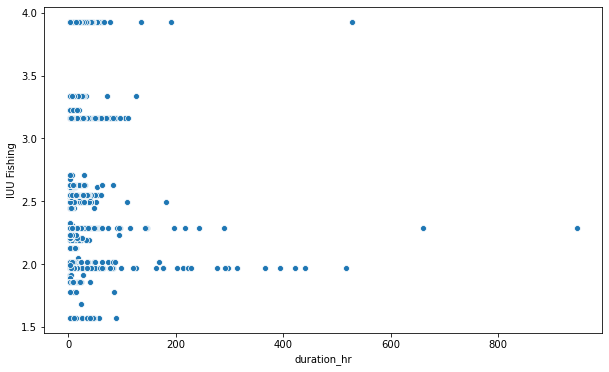

In [37]:
#plot checking for trends

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="duration_hr",
                y="IUU Fishing",
                #hue='country',
                legend=False,
                ax=ax);

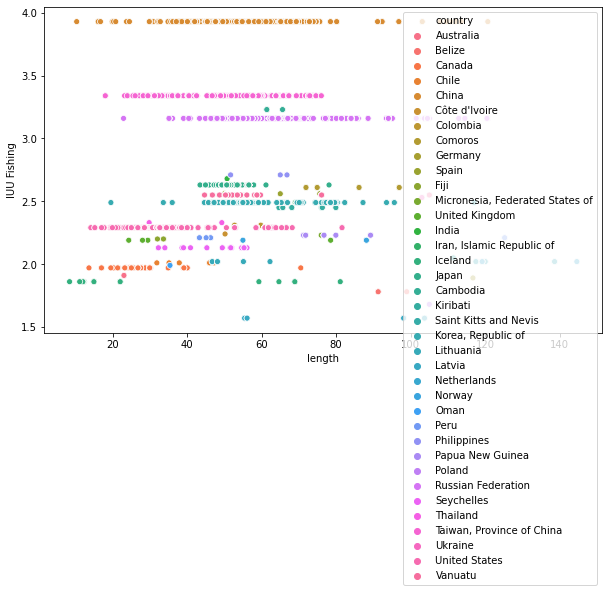

In [38]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="length",
                y="IUU Fishing",
                hue='country',
                ax=ax);

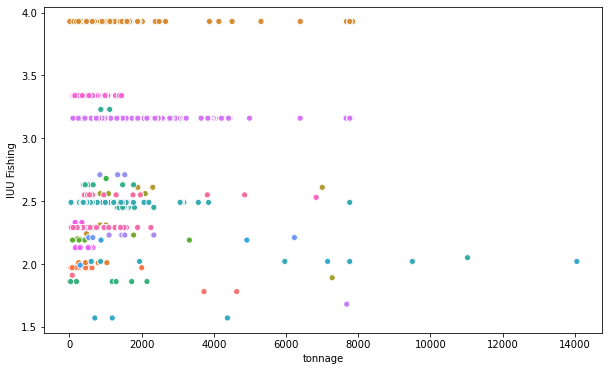

In [39]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="tonnage",
                y="IUU Fishing",
                hue='country',
                legend=False,
                ax=ax);

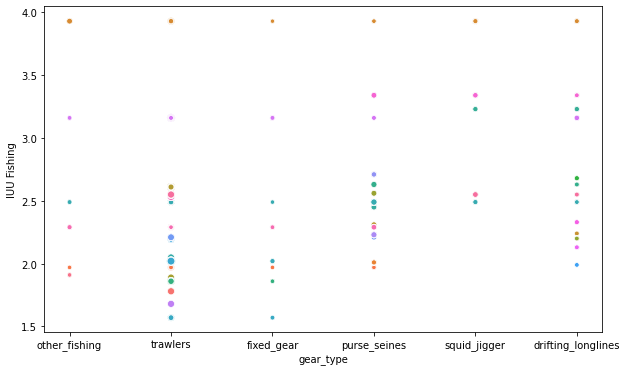

In [40]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="gear_type",
                y="IUU Fishing",
                hue='country',
                size='engine_power',
                legend=False,
                ax=ax);

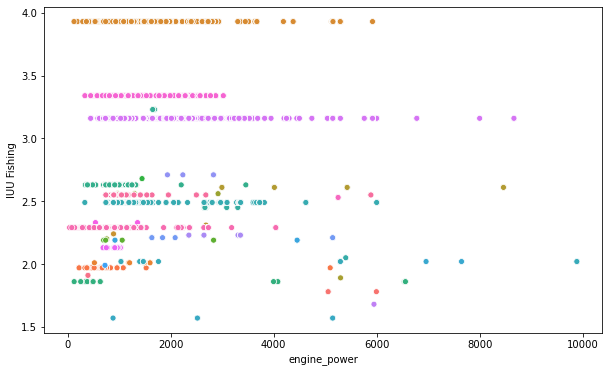

In [41]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="engine_power",
                y="IUU Fishing",
                hue='country',
                legend=False,
                ax=ax);

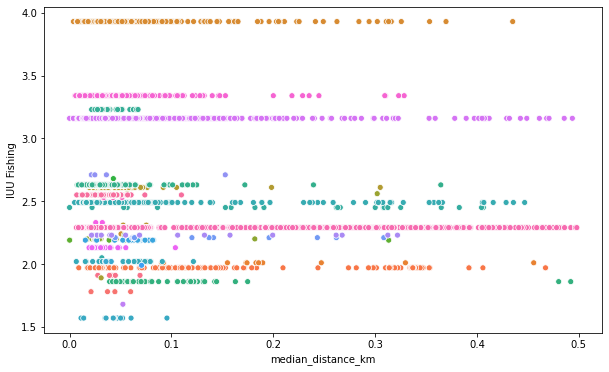

In [42]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="median_distance_km",
                y="IUU Fishing",
                hue='country',
                legend=False,
                ax=ax);

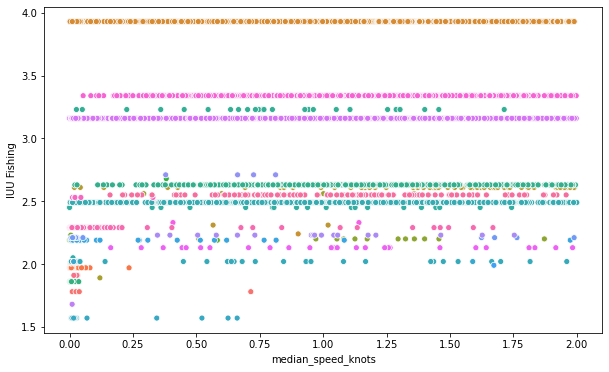

In [43]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="median_speed_knots",
                y="IUU Fishing",
                hue='country',
                legend=False,
                ax=ax);

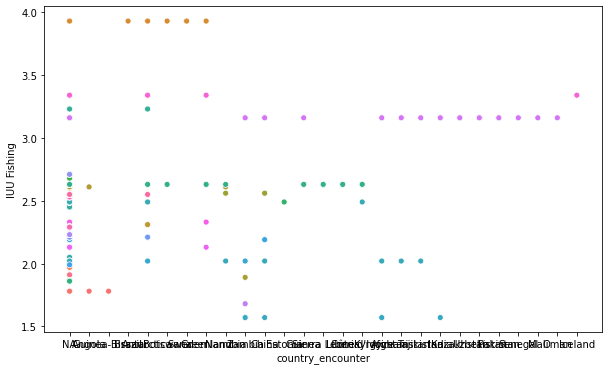

In [44]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=lindf,
                x="country_encounter",
                y="IUU Fishing",
                hue='country',
                legend=False,
                ax=ax);

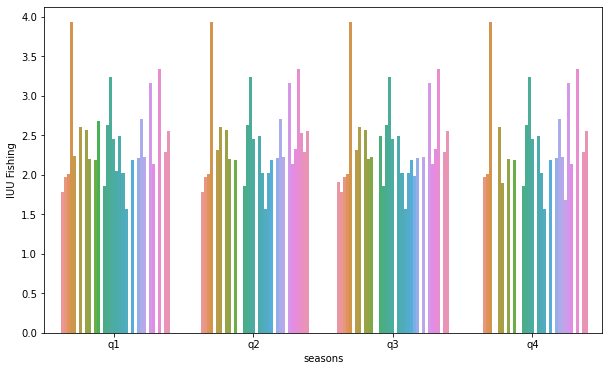

In [45]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
g = sns.barplot(data=lindf,
                x="seasons",
                y="IUU Fishing",
                hue='country',
                ax=ax);

g.legend_.remove()

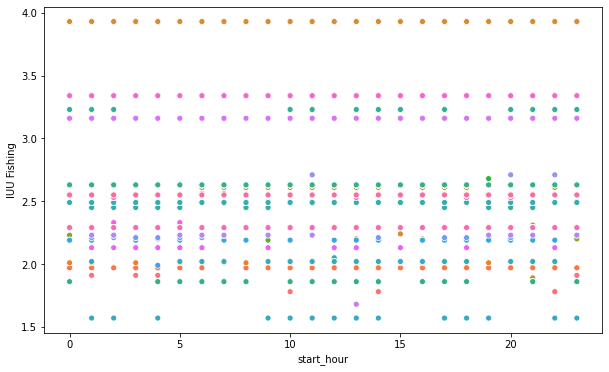

In [46]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
g = sns.scatterplot(data=lindf,
                x="start_hour",
                y="IUU Fishing",
                hue='country',
                ax=ax);

g.legend_.remove()

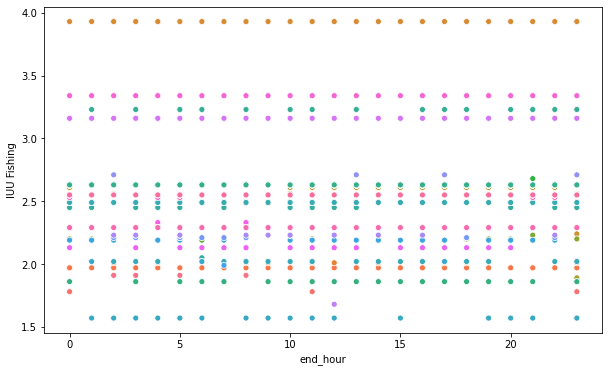

In [47]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
g = sns.scatterplot(data=lindf,
                x="end_hour",
                y="IUU Fishing",
                hue='country',
                ax=ax);

g.legend_.remove()

In [48]:
lindf.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_encounter,start_month,start_hour,end_month,end_hour,seasons
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2,q3
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5,q3
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3,q3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8,q3
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2,q3


In [49]:
#check country occurences

encounters=lindf.groupby(['country_encounter']).agg({'country_encounter':'count'})

In [50]:
encounters['country_enc']=encounters.index

In [51]:
encounters.columns=['occurences','country_enc']

In [52]:
encounters['occurences'].sort_values(ascending=False)

country_encounter
NA               9156
Antarctica        512
India             372
Zambia            125
Kazakhstan         96
Kyrgyzstan         53
Greenland          44
China              42
Afghanistan        38
Pakistan           18
Tajikistan         14
Sweden             11
Uzbekistan          9
Namibia             7
Sierra Leone        5
Guinea              5
Côte d'Ivoire       4
Liberia             4
Angola              3
Senegal             3
Botswana            2
Mali                2
Estonia             1
Iceland             1
Brazil              1
Oman                1
Guinea-Bissau       1
Name: occurences, dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

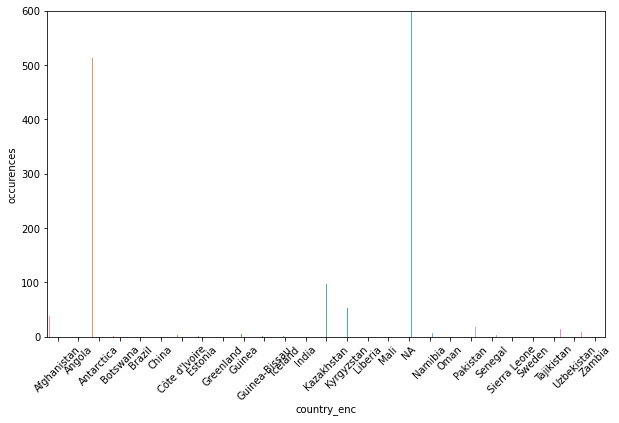

In [53]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
g = sns.barplot(data=encounters,
                x="country_enc",
                y="occurences",
                hue='country_enc',
                ax=ax);

g.set(ylim=(0, 600))
g.legend_.remove()
#g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45)

In [54]:
#check further country analysis with IUU

country_an=lindf.groupby(['country']).agg({'country':'count','IUU Fishing':'mean'})

In [55]:
country_an.columns=['Country_count','IUU Fishing']

In [56]:
country_an

,Country_count,IUU Fishing
country,,
Australia,5,1.91
Belize,4,1.78
Cambodia,25,3.23
Canada,183,1.97
Chile,11,2.01
China,1715,3.93
Colombia,2,2.31
Comoros,64,2.61
Côte d'Ivoire,1,2.24


[(0.0, 50.0)]

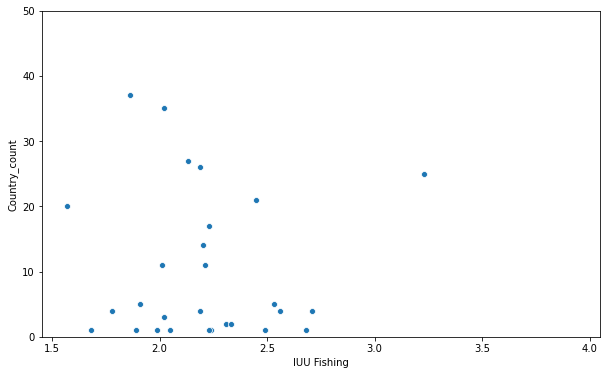

In [57]:
#check for correlation

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=country_an,
                x="IUU Fishing",
                y="Country_count",
                ax=ax);
ax.set(ylim=(0, 50))

In [58]:
# CHECK OLS FOR COUNTRY AN1111

## 4 Basic OLS: Linear regression

In [59]:
lindf.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_encounter,start_month,start_hour,end_month,end_hour,seasons
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2,q3
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5,q3
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3,q3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8,q3
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2,q3


In [60]:
#create copy

lindf_2=lindf.copy()

In [61]:
#dummy

dummycountry=pd.get_dummies(lindf_2['country'])
lindf_2 = lindf_2.drop(['country'],axis = 1)
lindf_2 = lindf_2.join(dummycountry)

In [62]:
lindf_2.columns

Index(['gear_type', 'length', 'tonnage', 'engine_power', 'IUU Fishing',
       'duration_hr', 'median_distance_km', 'median_speed_knots',
       'country_encounter', 'start_month', 'start_hour', 'end_month',
       'end_hour', 'seasons', 'Australia', 'Belize', 'Cambodia', 'Canada',
       'Chile', 'China', 'Colombia', 'Comoros', 'Côte d'Ivoire', 'Fiji',
       'Germany', 'Iceland', 'India', 'Iran, Islamic Republic of', 'Japan',
       'Kiribati', 'Korea, Republic of', 'Latvia', 'Lithuania',
       'Micronesia, Federated States of', 'Netherlands', 'Norway', 'Oman',
       'Papua New Guinea', 'Peru', 'Philippines', 'Poland',
       'Russian Federation', 'Saint Kitts and Nevis', 'Seychelles', 'Spain',
       'Taiwan, Province of China', 'Thailand', 'Ukraine', 'United Kingdom',
       'United States', 'Vanuatu'],
      dtype='object')

In [63]:
#try regression

lindf_2= sm.add_constant(lindf_2)
ylindf_2 = lindf_2["IUU Fishing"]
Xlindf_2 = lindf_2[["const",'Australia', 'Belize', 'Cambodia', 'Canada','Chile', 'China', 'Colombia', 'Comoros', "Côte d'Ivoire", 'Fiji','Germany', 'Iceland', 'India', 'Iran, Islamic Republic of', 'Japan','Kiribati', 'Korea, Republic of', 'Latvia', 'Lithuania','Micronesia, Federated States of', 'Netherlands', 'Norway', 'Oman','Papua New Guinea', 'Peru', 'Philippines', 'Poland','Russian Federation', 'Saint Kitts and Nevis', 'Seychelles', 'Spain','Taiwan, Province of China', 'Thailand', 'Ukraine', 'United Kingdom','United States', 'Vanuatu']]
reglindf_2 = sm.OLS(ylindf_2, Xlindf_2).fit()

reglindf_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.027e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:55:22   Log-Likelihood:                 21383.
No. Observations:               10530   AIC:                        -4.269e+04
Df Residuals:                   10493   BIC:                        -4.242e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.0749   2.56e+10   8.09e-11      1.000   -5.03e+10    5.03e+10
Australia                          -0.1647   2.56e+10  -6.42e-12      1.000   -5.03e+10    5.03e+10
Belize                             -0.2963   2.56e+10  -1.16e-11      1.000   -5.03e+10    5.03e+10
Cambodia                            1.1556   2.56e+10   4.51e-11      1.000   -5.03e+10    5.03e+10
Canada                             -0.1071   2.56e+10  -4.18e-12      1.000   -5.03e+10    5.03e+10
Chile                              -0.0661   2.56e+10  -2.58e-12      1.000   -5.03e+10    5.03e+10
China                               1.8768   2.56e+10   7.32e-11      1.000   -5.03e+10    5.03e+10
Colombia                            0.2330   2.56e+10   9.09e-12      1.000   -5.03e+10    5.03e+10
Comoros                             0.5279   2.56e+10   2.06e-11      1.000   -5.03e+10    5.03e+10
Côte d'Ivoire                       0.1656   2.56e+10   6.46e-12      1.000   -5.03e+10    5.03e+10
Fiji                                0.1199   2.56e+10   4.68e-12      1.000   -5.03e+10    5.03e+10
Germany                            -0.1889   2.56e+10  -7.37e-12      1.000   -5.03e+10    5.03e+10
Iceland                            -0.2187   2.56e+10  -8.53e-12      1.000   -5.03e+10    5.03e+10
India                               0.6041   2.56e+10   2.36e-11      1.000   -5.03e+10    5.03e+10
Iran, Islamic Republic of           0.4141   2.56e+10   1.62e-11      1.000   -5.03e+10    5.03e+10
Japan                               0.5660   2.56e+10   2.21e-11      1.000   -5.03e+10    5.03e+10
Kiribati                            0.3731   2.56e+10   1.46e-11      1.000   -5.03e+10    5.03e+10
Korea, Republic of                  0.3977   2.56e+10   1.55e-11      1.000   -5.03e+10    5.03e+10
Latvia                             -0.5119   2.56e+10     -2e-11      1.000   -5.03e+10    5.03e+10
Lithuania                          -0.0629   2.56e+10  -2.45e-12      1.000   -5.03e+10    5.03e+10
Micronesia, Federated States of     0.1553   2.56e+10   6.06e-12      1.000   -5.03e+10    5.03e+10
Netherlands                        -0.0549   2.56e+10  -2.14e-12      1.000   -5.03e+10    5.03e+10
Norway                              0.1116   2.56e+10   4.35e-12      1.000   -5.03e+10    5.03e+10
Oman                               -0.0903   2.56e+10  -3.52e-12      1.000   -5.03e+10    5.03e+10
Papua New Guinea                    0.1504   2.56e+10   5.87e-12      1.000   -5.03e+10    5.03e+10
Peru                                0.1299   2.56e+10   5.07e-12      1.000   -5.03e+10    5.03e+10
Philippines                         0.6329   2.56e+10   2.47e-11      1.000   -5.03e+10    5.03e+10
Poland                             -0.4020   2.56e+10  -1.57e-11      1.000   -5.03

## 5 Linear model IUU and country

In [64]:
lindf_2.head()

,const,gear_type,length,tonnage,engine_power,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_encounter,...,Russian Federation,Saint Kitts and Nevis,Seychelles,Spain,"Taiwan, Province of China",Thailand,Ukraine,United Kingdom,United States,Vanuatu
0,1.0,other_fishing,23.009784,78.895456,394.867663,1.91,2.166667,0.069157,0.031628,NA,...,0,0,0,0,0,0,0,0,0,0
1,1.0,other_fishing,23.009784,78.895456,394.867663,1.91,2.000000,0.027717,0.024307,NA,...,0,0,0,0,0,0,0,0,0,0
2,1.0,other_fishing,23.009784,78.895456,394.867663,1.91,2.000000,0.041409,0.018666,NA,...,0,0,0,0,0,0,0,0,0,0
3,1.0,other_fishing,23.009784,78.895456,394.867663,1.91,3.833333,0.044934,0.029034,NA,...,0,0,0,0,0,0,0,0,0,0
4,1.0,other_fishing,23.009784,78.895456,394.867663,1.91,26.333333,0.039192,0.016855,NA,...,0,0,0,0,0,0,0,0,0,0


In [65]:
lindf_2.corr()['IUU Fishing']

const                                   NaN
length                             0.251650
tonnage                            0.141647
engine_power                       0.151534
IUU Fishing                        1.000000
duration_hr                       -0.082865
median_distance_km                -0.312466
median_speed_knots                 0.243235
start_month                        0.010185
start_hour                         0.045726
end_month                          0.008597
end_hour                           0.014650
Australia                         -0.048152
Belize                            -0.047866
Cambodia                           0.014199
Canada                            -0.278689
Chile                             -0.065316
China                              0.713218
Colombia                          -0.020007
Comoros                           -0.069074
Côte d'Ivoire                     -0.015438
Fiji                              -0.060565
Germany                         

In [66]:
#check types to change

lindf_2.dtypes

const                               float64
gear_type                            object
length                              float64
tonnage                             float64
engine_power                        float64
IUU Fishing                         float64
duration_hr                         float64
median_distance_km                  float64
median_speed_knots                  float64
country_encounter                    object
start_month                           int64
start_hour                            int64
end_month                             int64
end_hour                              int64
seasons                            category
Australia                             uint8
Belize                                uint8
Cambodia                              uint8
Canada                                uint8
Chile                                 uint8
China                                 uint8
Colombia                              uint8
Comoros                         

In [67]:
#dummy gear type, country_encounter and category needed

In [68]:
#creating copy just in case since the other model was already accurate

total_lindf=lindf_2.copy()

In [69]:
#getting dummies for all

geardummies=pd.get_dummies(total_lindf['gear_type'])
encounterdummies=pd.get_dummies(total_lindf['country_encounter'], prefix='encounter')
seasondummies=pd.get_dummies(total_lindf['seasons'])

In [70]:
#dropping before dummies columns

total_lindf = total_lindf.drop(['gear_type','country_encounter','seasons'],axis = 1)

In [71]:
#join

total_lindf=total_lindf.join(geardummies)
total_lindf=total_lindf.join(encounterdummies)
total_lindf=total_lindf.join(seasondummies)

In [72]:
#check

total_lindf.head()

,const,length,tonnage,engine_power,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,start_month,start_hour,...,encounter_Senegal,encounter_Sierra Leone,encounter_Sweden,encounter_Tajikistan,encounter_Uzbekistan,encounter_Zambia,q1,q2,q3,q4
0,1.0,23.009784,78.895456,394.867663,1.91,2.166667,0.069157,0.031628,7,23,...,0,0,0,0,0,0,0,0,1,0
1,1.0,23.009784,78.895456,394.867663,1.91,2.000000,0.027717,0.024307,8,3,...,0,0,0,0,0,0,0,0,1,0
2,1.0,23.009784,78.895456,394.867663,1.91,2.000000,0.041409,0.018666,7,1,...,0,0,0,0,0,0,0,0,1,0
3,1.0,23.009784,78.895456,394.867663,1.91,3.833333,0.044934,0.029034,7,4,...,0,0,0,0,0,0,0,0,1,0
4,1.0,23.009784,78.895456,394.867663,1.91,26.333333,0.039192,0.016855,7,23,...,0,0,0,0,0,0,0,0,1,0


In [73]:
total_lindf.corr()['IUU Fishing'].sort_values(ascending=False)

IUU Fishing             1.000000
China                   0.713218
squid_jigger            0.396696
encounter_Antarctica    0.293640
length                  0.251650
                          ...   
median_distance_km     -0.312466
Korea, Republic of     -0.319102
fixed_gear             -0.342498
United States          -0.495432
const                        NaN
Name: IUU Fishing, Length: 86, dtype: float64

In [74]:
total_lindf.columns

Index(['const', 'length', 'tonnage', 'engine_power', 'IUU Fishing',
       'duration_hr', 'median_distance_km', 'median_speed_knots',
       'start_month', 'start_hour', 'end_month', 'end_hour', 'Australia',
       'Belize', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Comoros',
       'Côte d'Ivoire', 'Fiji', 'Germany', 'Iceland', 'India',
       'Iran, Islamic Republic of', 'Japan', 'Kiribati', 'Korea, Republic of',
       'Latvia', 'Lithuania', 'Micronesia, Federated States of', 'Netherlands',
       'Norway', 'Oman', 'Papua New Guinea', 'Peru', 'Philippines', 'Poland',
       'Russian Federation', 'Saint Kitts and Nevis', 'Seychelles', 'Spain',
       'Taiwan, Province of China', 'Thailand', 'Ukraine', 'United Kingdom',
       'United States', 'Vanuatu', 'drifting_longlines', 'fixed_gear',
       'other_fishing', 'purse_seines', 'squid_jigger', 'trawlers',
       'encounter_Afghanistan', 'encounter_Angola', 'encounter_Antarctica',
       'encounter_Botswana', 'encounter_Bra

In [75]:
#china for case study

## 6 Trying to improve the model by binning

In [76]:
#creating copy

bin_df=lindf.copy()

In [77]:
#check

bin_df.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_encounter,start_month,start_hour,end_month,end_hour,seasons
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2,q3
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5,q3
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3,q3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8,q3
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2,q3


In [78]:
#binning length

bin_df['length'].sort_values().tolist()

[8.41,
 10.3232474949,
 11.13,
 11.95,
 11.95,
 11.99,
 11.99,
 11.99,
 11.99,
 11.99,
 11.99,
 11.99,
 11.99,
 12.31,
 13.6178912258,
 14.1221547649,
 14.1221547649,
 14.1221547649,
 14.1221547649,
 14.85,
 14.948015263399999,
 14.948015263399999,
 14.948015263399999,
 14.948015263399999,
 14.948015263399999,
 15.18292683,
 15.2,
 16.1018137974,
 16.1018137974,
 16.1018137974,
 16.1018137974,
 16.7119817281,
 16.9687838855,
 16.9687838855,
 16.9687838855,
 16.9687838855,
 16.9687838855,
 16.9687838855,
 16.9687838855,
 17.0,
 17.62195122,
 17.62195122,
 17.62195122,
 17.62195122,
 17.68292683,
 17.68292683,
 17.68292683,
 17.68292683,
 17.68292683,
 17.68292683,
 17.68292683,
 17.68292683,
 17.68292683,
 18.0,
 18.0,
 18.0,
 18.0,
 19.3053671331,
 19.3053671331,
 19.3053671331,
 19.48,
 19.508001901300002,
 19.605609985999997,
 19.8715883088,
 19.90853659,
 20.2035460291,
 20.2035460291,
 20.2035460291,
 20.219407091,
 20.79268293,
 20.8050792011,
 20.9821850507,
 21.312513639200002,


In [79]:
#setting conditions looking into the data

conditions = [
    (bin_df['length'] <= 25),
    ((bin_df['length'] > 25) & (bin_df['length'] <= 50)),
    ((bin_df['length'] > 50) & (bin_df['length'] <= 75)),
    ((bin_df['length'] > 75) & (bin_df['length'] <= 100)),
    ((bin_df['length'] > 100) & (bin_df['length'] <= 125)),
    (bin_df['length'] > 125)
]

choices = [
    'very small',
    'small',
    'medium',
    'medium/big',
    'big',
    'huge'
]

bin_df['length'] = np.select(conditions, choices, 'error')

In [80]:
#confirm

bin_df['length'].value_counts()

medium        5344
small         2276
big           1826
medium/big     801
very small     275
huge             8
Name: length, dtype: int64

In [81]:
#tonnage conditions

conditions = [
    (bin_df['tonnage'] <= 50),
    ((bin_df['tonnage'] > 50) & (bin_df['tonnage'] <= 100)),
    ((bin_df['tonnage'] > 100) & (bin_df['tonnage'] <= 150)),
    ((bin_df['tonnage'] > 150) & (bin_df['tonnage'] <= 200)),
    ((bin_df['tonnage'] > 250) & (bin_df['tonnage'] <= 300)),
    (bin_df['tonnage'] > 350)
]

choices = [
    'very small',
    'small',
    'medium',
    'medium/big',
    'big',
    'huge'
]

bin_df['tonnage'] = np.select(conditions, choices, 'error')

In [82]:
#engine power conditions

conditions = [
    (bin_df['engine_power'] <= 200),
    ((bin_df['engine_power'] > 200) & (bin_df['engine_power'] <= 400)),
    ((bin_df['engine_power'] > 400) & (bin_df['engine_power'] <= 600)),
    ((bin_df['engine_power'] > 600) & (bin_df['engine_power'] <= 800)),
    ((bin_df['engine_power'] > 800) & (bin_df['engine_power'] <= 1000)),
    (bin_df['engine_power'] > 1000)
]

choices = [
    'very small',
    'small',
    'medium',
    'medium/big',
    'big',
    'huge'
]

bin_df['engine_power'] = np.select(conditions, choices, 'error')

In [83]:
#duration conditions

conditions = [
    (bin_df['duration_hr'] <= 2.5),
    ((bin_df['duration_hr'] > 2.5) & (bin_df['duration_hr'] <= 5)),
    ((bin_df['duration_hr'] > 5) & (bin_df['duration_hr'] <= 7.5)),
    ((bin_df['duration_hr'] > 7.5) & (bin_df['duration_hr'] <= 10)),
    ((bin_df['duration_hr'] > 10) & (bin_df['duration_hr'] <= 12.5)),
    (bin_df['duration_hr'] > 12.5)
]

choices = [
    'very small',
    'small',
    'medium',
    'medium/big',
    'big',
    'huge'
]

bin_df['duration_hr'] = np.select(conditions, choices, 'error')



In [84]:
#distance and speed dont change much, can drop
#makes sense since the boats need to be slow and close to each other for the transshipment


In [85]:
bin_df.columns

Index(['gear_type', 'length', 'tonnage', 'engine_power', 'country',
       'IUU Fishing', 'duration_hr', 'median_distance_km',
       'median_speed_knots', 'country_encounter', 'start_month', 'start_hour',
       'end_month', 'end_hour', 'seasons'],
      dtype='object')

In [86]:
coltodrop=['median_distance_km','median_speed_knots','start_month', 'start_hour','end_month', 'end_hour']

In [87]:
bin_df=bin_df.drop(coltodrop, axis=1)
bin_df.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,country_encounter,seasons
0,other_fishing,very small,small,small,Australia,1.91,very small,NA,q3
1,other_fishing,very small,small,small,Australia,1.91,very small,NA,q3
2,other_fishing,very small,small,small,Australia,1.91,very small,NA,q3
3,other_fishing,very small,small,small,Australia,1.91,small,NA,q3
4,other_fishing,very small,small,small,Australia,1.91,huge,NA,q3


In [88]:
#creating dummies

dfopt=bin_df.copy()

dummygear=pd.get_dummies(dfopt['gear_type'])
dfopt = dfopt.drop(['gear_type'],axis = 1)
dfopt = dfopt.join(dummygear)

In [89]:
dummylength=pd.get_dummies(dfopt['length'], prefix='length')
dfopt = dfopt.drop(['length'],axis = 1)
dfopt = dfopt.join(dummylength)

In [90]:
dummytonnage=pd.get_dummies(dfopt['tonnage'], prefix='tonnage')
dfopt = dfopt.drop(['tonnage'],axis = 1)
dfopt = dfopt.join(dummytonnage)

In [91]:
dummyengine=pd.get_dummies(dfopt['engine_power'], prefix='engine_power')
dfopt = dfopt.drop(['engine_power'],axis = 1)
dfopt = dfopt.join(dummyengine)

In [92]:
dummycountry=pd.get_dummies(dfopt['country'], prefix='country')
dfopt = dfopt.drop(['country'],axis = 1)
dfopt = dfopt.join(dummycountry)

In [93]:
dummyduration=pd.get_dummies(dfopt['duration_hr'], prefix='duration_hr')
dfopt = dfopt.drop(['duration_hr'],axis = 1)
dfopt = dfopt.join(dummyduration)

In [94]:
dummycountry_encounter=pd.get_dummies(dfopt['country_encounter'], prefix='country_encounter')
dfopt = dfopt.drop(['country_encounter'],axis = 1)
dfopt = dfopt.join(dummycountry_encounter)

In [95]:
dummyseasons=pd.get_dummies(dfopt['seasons'], prefix='seasons')
dfopt = dfopt.drop(['seasons'],axis = 1)
dfopt = dfopt.join(dummyseasons)

In [96]:
dfopt.head()

,IUU Fishing,drifting_longlines,fixed_gear,other_fishing,purse_seines,squid_jigger,trawlers,length_big,length_huge,length_medium,...,country_encounter_Senegal,country_encounter_Sierra Leone,country_encounter_Sweden,country_encounter_Tajikistan,country_encounter_Uzbekistan,country_encounter_Zambia,seasons_q1,seasons_q2,seasons_q3,seasons_q4
0,1.91,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.91,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.91,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.91,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.91,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
dfopt.columns

Index(['IUU Fishing', 'drifting_longlines', 'fixed_gear', 'other_fishing',
       'purse_seines', 'squid_jigger', 'trawlers', 'length_big', 'length_huge',
       'length_medium', 'length_medium/big', 'length_small',
       'length_very small', 'tonnage_big', 'tonnage_error', 'tonnage_huge',
       'tonnage_medium', 'tonnage_medium/big', 'tonnage_small',
       'tonnage_very small', 'engine_power_big', 'engine_power_huge',
       'engine_power_medium', 'engine_power_medium/big', 'engine_power_small',
       'engine_power_very small', 'country_Australia', 'country_Belize',
       'country_Cambodia', 'country_Canada', 'country_Chile', 'country_China',
       'country_Colombia', 'country_Comoros', 'country_Côte d'Ivoire',
       'country_Fiji', 'country_Germany', 'country_Iceland', 'country_India',
       'country_Iran, Islamic Republic of', 'country_Japan',
       'country_Kiribati', 'country_Korea, Republic of', 'country_Latvia',
       'country_Lithuania', 'country_Micronesia, Federated

In [98]:
#checking OLS

dfopt1=dfopt.copy()

dfopt1= sm.add_constant(dfopt1)
ydfopt1 = dfopt1["IUU Fishing"]
Xdfopt1 = dfopt1[['const','drifting_longlines', 'fixed_gear', 'other_fishing','purse_seines', 'squid_jigger', 'trawlers', 'length_big', 'length_huge','length_medium', 'length_medium/big', 'length_small','length_very small', 'tonnage_big', 'tonnage_error', 'tonnage_huge','tonnage_medium', 'tonnage_medium/big', 'tonnage_small','tonnage_very small', 'engine_power_big', 'engine_power_huge','engine_power_medium', 'engine_power_medium/big', 'engine_power_small','engine_power_very small', 'country_Australia', 'country_Belize','country_Cambodia', 'country_Canada', 'country_Chile', 'country_China','country_Colombia', 'country_Comoros', "country_Côte d'Ivoire",'country_Fiji', 'country_Germany', 'country_Iceland', 'country_India','country_Iran, Islamic Republic of', 'country_Japan','country_Kiribati', 'country_Korea, Republic of', 'country_Latvia','country_Lithuania', 'country_Micronesia, Federated States of','country_Netherlands', 'country_Norway', 'country_Oman','country_Papua New Guinea', 'country_Peru', 'country_Philippines','country_Poland', 'country_Russian Federation','country_Saint Kitts and Nevis', 'country_Seychelles', 'country_Spain','country_Taiwan, Province of China', 'country_Thailand','country_Ukraine', 'country_United Kingdom', 'country_United States','country_Vanuatu', 'duration_hr_big', 'duration_hr_huge','duration_hr_medium', 'duration_hr_medium/big', 'duration_hr_small','duration_hr_very small', 'country_encounter_Afghanistan','country_encounter_Angola', 'country_encounter_Antarctica','country_encounter_Botswana', 'country_encounter_Brazil','country_encounter_China', "country_encounter_Côte d'Ivoire",'country_encounter_Estonia', 'country_encounter_Greenland','country_encounter_Guinea', 'country_encounter_Guinea-Bissau','country_encounter_Iceland', 'country_encounter_India','country_encounter_Kazakhstan', 'country_encounter_Kyrgyzstan','country_encounter_Liberia', 'country_encounter_Mali','country_encounter_NA', 'country_encounter_Namibia','country_encounter_Oman', 'country_encounter_Pakistan','country_encounter_Senegal', 'country_encounter_Sierra Leone','country_encounter_Sweden', 'country_encounter_Tajikistan', 'country_encounter_Uzbekistan', 'country_encounter_Zambia', 'seasons_q1', 'seasons_q2', 'seasons_q3', 'seasons_q4']]
regdfopt1 = sm.OLS(ydfopt1, Xdfopt1).fit()

regdfopt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.627e+06
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:55:42   Log-Likelihood:                 46280.
No. Observations:               10530   AIC:                        -9.238e+04
Df Residuals:                   10439   BIC:                        -9.172e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       2.4126   5.57e+09   4.33e-10      1.000   -1.09e+10    1.09e+10
drifting_longlines                          0.0979   3.68e+08   2.66e-10      1.000   -7.21e+08    7.21e+08
fixed_gear                                  0.0978   3.68e+08   2.66e-10      1.000   -7.21e+08    7.21e+08
other_fishing                               0.0977   3.68e+08   2.66e-10      1.000   -7.21e+08    7.21e+08
purse_seines                                0.0976   3.68e+08   2.65e-10      1.000   -7.21e+08    7.21e+08
squid_jigger                                0.0972   3.68e+08   2.64e-10      1.000   -7.21e+08    7.21e+08
trawlers                                    0.0977   3.68e+08   2.66e-10      1.000   -7.21e+08    7.21e+08
length_big                                  0.1619   9.31e+07   1.74e-09      1.000   -1.83e+08    1.83e+08
length_huge                                 0.1620   9.31e+07   1.74e-09      1.000   -1.83e+08    1.83e+08
length_medium                               0.1620   9.31e+07   1.74e-09      1.000   -1.83e+08    1.83e+08
length_medium/big                           0.1619   9.31e+07   1.74e-09      1.000   -1.83e+08    1.83e+08
length_small                                0.1619   9.31e+07   1.74e-09      1.000   -1.83e+08    1.83e+08
length_very small                           0.1620   9.31e+07   1.74e-09      1.000   -1.83e+08    1.83e+08
tonnage_big                                 0.0073   6.41e+08   1.14e-11      1.000   -1.26e+09    1.26e+09
tonnage_error                               0.0071   6.41e+08   1.11e-11      1.000   -1.26e+09    1.26e+09
tonnage_huge                                0.0074   6.41e+08   1.16e-11      1.000   -1.26e+09    1.26e+09
tonnage_medium                              0.0070   6.41e+08   1.09e-11      1.000   -1.26e+09    1.26e+09
tonnage_medium/big                          0.0065   6.41e+08   1.01e-11      1.000   -1.26e+09    1.26e+09
tonnage_small                               0.0071   6.41e+08   1.11e-11      1.000   -1.26e+09    1.26e+09
tonnage_very small                          0.0069   6.41e+08   1.08e-11      1.000   -1.26e+09    1.26e+09
engine_power_big                           -0.2090   1.68e+09  -1.25e-10      1.000   -3.29e+09    3.29e+09
engine_power_huge                          -0.2103   1.68e+09  -1.25e-10      1.000   -3.29e+09    3.29e+09
engine_power_medium                        -0.2132   1.68e+09  -1.27e-10      1.000   -3.29e+09    3.29e+09
engine_power_medium/big                    -0.2089   1.68e+09  -1.24e-10      1.000   -3.29e+09    3.29e+09
engine_power_small                         -0.2115   1.68e+09  -1.26e-10      1.000   -3.29e+09    3.29e+09
engine_power_very small                    -0.2094   1.68e+

## 7 Linear regression

In [99]:
dfopt1= sm.add_constant(dfopt1)
ydfopt1 = dfopt1["IUU Fishing"]
Xdfopt1 = dfopt1[['const','drifting_longlines', 'fixed_gear', 'other_fishing','purse_seines', 'squid_jigger', 'trawlers', 'length_big', 'length_huge','length_medium', 'length_medium/big', 'length_small','length_very small', 'tonnage_big', 'tonnage_error', 'tonnage_huge','tonnage_medium', 'tonnage_medium/big', 'tonnage_small','tonnage_very small', 'engine_power_big', 'engine_power_huge','engine_power_medium', 'engine_power_medium/big', 'engine_power_small','engine_power_very small','duration_hr_big', 'duration_hr_huge','duration_hr_medium', 'duration_hr_medium/big', 'duration_hr_small','duration_hr_very small', 'country_encounter_Afghanistan','country_encounter_Angola', 'country_encounter_Antarctica','country_encounter_Botswana', 'country_encounter_Brazil','country_encounter_China', "country_encounter_Côte d'Ivoire",'country_encounter_Estonia', 'country_encounter_Greenland','country_encounter_Guinea', 'country_encounter_Guinea-Bissau','country_encounter_Iceland', 'country_encounter_India','country_encounter_Kazakhstan', 'country_encounter_Kyrgyzstan','country_encounter_Liberia', 'country_encounter_Mali','country_encounter_NA', 'country_encounter_Namibia','country_encounter_Oman', 'country_encounter_Pakistan','country_encounter_Senegal', 'country_encounter_Sierra Leone','country_encounter_Sweden', 'country_encounter_Tajikistan', 'country_encounter_Uzbekistan', 'country_encounter_Zambia', 'seasons_q1', 'seasons_q2', 'seasons_q3', 'seasons_q4']]
regdfopt1 = sm.OLS(ydfopt1, Xdfopt1).fit()

regdfopt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     122.7
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:55:44   Log-Likelihood:                -5596.3
No. Observations:               10530   AIC:                         1.130e+04
Df Residuals:                   10474   BIC:                         1.171e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.045e+11   7.35e+11     -0.278      0.781   -1.65e+12    1.24e+12
drifting_longlines                1.35e+10   4.85e+10      0.278      0.781   -8.16e+10    1.09e+11
fixed_gear                        1.35e+10   4.85e+10      0.278      0.781   -8.16e+10    1.09e+11
other_fishing                     1.35e+10   4.85e+10      0.278      0.781   -8.16e+10    1.09e+11
purse_seines                      1.35e+10   4.85e+10      0.278      0.781   -8.16e+10    1.09e+11
squid_jigger                      1.35e+10   4.85e+10      0.278      0.781   -8.16e+10    1.09e+11
trawlers                          1.35e+10   4.85e+10      0.278      0.781   -8.16e+10    1.09e+11
length_big                       3.601e+09   1.29e+10      0.278      0.781   -2.18e+10     2.9e+10
length_huge                      3.601e+09   1.29e+10      0.278      0.781   -2.18e+10     2.9e+10
length_medium                    3.601e+09   1.29e+10      0.278      0.781   -2.18e+10     2.9e+10
length_medium/big                3.601e+09   1.29e+10      0.278      0.781   -2.18e+10     2.9e+10
length_small                     3.601e+09   1.29e+10      0.278      0.781   -2.18e+10     2.9e+10
length_very small                3.601e+09   1.29e+10      0.278      0.781   -2.18e+10     2.9e+10
tonnage_big                      2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
tonnage_error                    2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
tonnage_huge                     2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
tonnage_medium                   2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
tonnage_medium/big               2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
tonnage_small                    2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
tonnage_very small               2.539e+10   9.13e+10      0.278      0.781   -1.54e+11    2.04e+11
engine_power_big                 5.718e+10   2.06e+11      0.278      0.781   -3.46e+11     4.6e+11
engine_power_huge                5.718e+10   2.06e+11      0.278      0.781   -3.46e+11     4.6e+11
engine_power_medium              5.718e+10   2.06e+11      0.278      0.781   -3.46e+11     4.6e+11
engine_power_medium/big          5.718e+10   2.06e+11      0.278      0.781   -3.46e+11     4.6e+11
engine_power_small               5.718e+10   2.06e+11      0.278      0.781   -3.46e+11     4.6e+11
engine_power_very small          5.718e+10   2.06e+11      0.278      0.781   -3.46e+11     4.6e+11
duration_hr_big                  4.003e+10   1.44e+11      0.278      0.781   -2.42e+11    3.22e+11
duration_hr_huge                 4.003e+10   1.44e+11      0.278      0.781   -2.42

In [100]:
dfopt1.corr()['IUU Fishing'].sort_values()

country_United States        -0.495432
fixed_gear                   -0.342498
country_Korea, Republic of   -0.319102
country_Canada               -0.278689
tonnage_medium/big           -0.251418
                                ...   
squid_jigger                  0.396696
tonnage_huge                  0.396930
country_China                 0.713218
IUU Fishing                   1.000000
const                              NaN
Name: IUU Fishing, Length: 101, dtype: float64

## 8 Linear regression without binning

In [101]:
#check columns

bin_df.columns

Index(['gear_type', 'length', 'tonnage', 'engine_power', 'country',
       'IUU Fishing', 'duration_hr', 'country_encounter', 'seasons'],
      dtype='object')

In [102]:
#check

bin_df.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,country_encounter,seasons
0,other_fishing,very small,small,small,Australia,1.91,very small,NA,q3
1,other_fishing,very small,small,small,Australia,1.91,very small,NA,q3
2,other_fishing,very small,small,small,Australia,1.91,very small,NA,q3
3,other_fishing,very small,small,small,Australia,1.91,small,NA,q3
4,other_fishing,very small,small,small,Australia,1.91,huge,NA,q3


In [103]:
#checking full regression without the country effect

regtotaldf=total_lindf.copy()

regtotaldf.columns

Index(['const', 'length', 'tonnage', 'engine_power', 'IUU Fishing',
       'duration_hr', 'median_distance_km', 'median_speed_knots',
       'start_month', 'start_hour', 'end_month', 'end_hour', 'Australia',
       'Belize', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Comoros',
       'Côte d'Ivoire', 'Fiji', 'Germany', 'Iceland', 'India',
       'Iran, Islamic Republic of', 'Japan', 'Kiribati', 'Korea, Republic of',
       'Latvia', 'Lithuania', 'Micronesia, Federated States of', 'Netherlands',
       'Norway', 'Oman', 'Papua New Guinea', 'Peru', 'Philippines', 'Poland',
       'Russian Federation', 'Saint Kitts and Nevis', 'Seychelles', 'Spain',
       'Taiwan, Province of China', 'Thailand', 'Ukraine', 'United Kingdom',
       'United States', 'Vanuatu', 'drifting_longlines', 'fixed_gear',
       'other_fishing', 'purse_seines', 'squid_jigger', 'trawlers',
       'encounter_Afghanistan', 'encounter_Angola', 'encounter_Antarctica',
       'encounter_Botswana', 'encounter_Bra

In [104]:
#checking OLS without bins

yregtotaldf = regtotaldf["IUU Fishing"]
Xregtotaldf = regtotaldf[['const', 'length', 'tonnage', 'engine_power','duration_hr', 'median_distance_km', 'median_speed_knots','start_month', 'start_hour', 'end_month', 'end_hour', 'drifting_longlines', 'fixed_gear', 'other_fishing', 'purse_seines', 'squid_jigger', 'trawlers','encounter_Afghanistan', 'encounter_Angola', 'encounter_Antarctica', 'encounter_Botswana', 'encounter_Brazil', 'encounter_China', "encounter_Côte d'Ivoire", 'encounter_Estonia', 'encounter_Greenland', 'encounter_Guinea', 'encounter_Guinea-Bissau', 'encounter_Iceland', 'encounter_India', 'encounter_Kazakhstan', 'encounter_Kyrgyzstan', 'encounter_Liberia', 'encounter_Mali', 'encounter_NA','encounter_Namibia', 'encounter_Oman', 'encounter_Pakistan','encounter_Senegal', 'encounter_Sierra Leone', 'encounter_Sweden','encounter_Tajikistan', 'encounter_Uzbekistan', 'encounter_Zambia','q1', 'q2', 'q3', 'q4']]
reg_regtotaldf = sm.OLS(yregtotaldf, Xregtotaldf).fit()

reg_regtotaldf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     136.9
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:55:50   Log-Likelihood:                -5825.5
No. Observations:               10530   AIC:                         1.174e+04
Df Residuals:                   10485   BIC:                         1.207e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.6776      0.042     39.845      0.000       1.595       1.760
length                      0.0052      0.001      9.702      0.000       0.004       0.006
tonnage                  1.414e-05    6.7e-06      2.110      0.035    1.01e-06    2.73e-05
engine_power            -2.755e-05   7.16e-06     -3.850      0.000   -4.16e-05   -1.35e-05
duration_hr                -0.0013      0.000     -6.555      0.000      -0.002      -0.001
median_distance_km         -0.9341      0.068    -13.704      0.000      -1.068      -0.800
median_speed_knots          0.0760      0.009      8.620      0.000       0.059       0.093
start_month                 0.0337      0.013      2.510      0.012       0.007       0.060
start_hour                  0.0010      0.001      1.644      0.100      -0.000       0.002
end_month                  -0.0139      0.013     -1.095      0.274      -0.039       0.011
end_hour                   -0.0002      0.001     -0.330      0.741      -0.001       0.001
drifting_longlines          0.4150      0.015     28.266      0.000       0.386       0.444
fixed_gear                  0.0889      0.017      5.123      0.000       0.055       0.123
other_fishing               0.0384      0.031      1.226      0.220      -0.023       0.100
purse_seines               -0.0902      0.035     -2.608      0.009      -0.158      -0.022
squid_jigger                0.8196      0.017     47.241      0.000       0.786       0.854
trawlers                    0.4058      0.013     30.793      0.000       0.380       0.432
encounter_Afghanistan       0.2471      0.079      3.114      0.002       0.092       0.403
encounter_Angola           -0.6168      0.239     -2.581      0.010      -1.085      -0.148
encounter_Antarctica        0.4404      0.049      9.002      0.000       0.345       0.536
encounter_Botswana          0.1862      0.291      0.640      0.522      -0.384       0.756
encounter_Brazil            0.7844      0.409      1.918      0.055      -0.017       1.586
encounter_China             0.0487      0.077      0.632      0.527      -0.102       0.200
encounter_Côte d'Ivoire    -0.3256      0.208     -1.565      0.118      -0.733       0.082
encounter_Estonia           0.1240      0.410      0.302      0.763      -0.681       0.929
encounter_Greenland         0.4246      0.076      5.592      0.000       0.276       0.573
encounter_Guinea           -0.1738      0.187     -0.930      0.353      -0.540       0.193
encounter_Guinea-Bissau    -1.2794      0.409     -3.129      0.002      -2.081      -0.478
encounter_Iceland           0.4155      0.409      1.017      0.309      -0.386       1.217
encounter_India             0.3029      0.049      6.206      0.000       0.207       0.399
encounter_Kazakhstan        0.2932      0.060  

In [105]:
#model improvement trial

regtotaldf2=total_lindf.copy()

yregtotaldf2 = regtotaldf2["IUU Fishing"]
Xregtotaldf2 = regtotaldf2[['const', 'start_month']]
reg_regtotaldf2 = sm.OLS(yregtotaldf2, Xregtotaldf2).fit()

reg_regtotaldf2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.092
Date:                Thu, 08 Oct 2020   Prob (F-statistic):              0.296
Time:                        09:55:51   Log-Likelihood:                -8214.6
No. Observations:               10530   AIC:                         1.643e+04
Df Residuals:                   10528   BIC:                         1.645e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.0657      0.011    268.157      0.000       3.043       3.088
start_month     0.0016      0.002      1.045      0.296      -0.001       0.005
==============================================================================
Omnibus:                      202.823   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.431
Skew:                          -0.135   Prob(JB):                     7.84e-29
Kurtosis:                       2.529   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 9 Proving IUU attempt OLs

In [106]:
#check

lindf.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,median_distance_km,median_speed_knots,country_encounter,start_month,start_hour,end_month,end_hour,seasons
0,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.166667,0.069157,0.031628,NA,7,23,7,2,q3
1,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.027717,0.024307,NA,8,3,8,5,q3
2,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,2.000000,0.041409,0.018666,NA,7,1,7,3,q3
3,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,3.833333,0.044934,0.029034,NA,7,4,7,8,q3
4,other_fishing,23.009784,78.895456,394.867663,Australia,1.91,26.333333,0.039192,0.016855,NA,7,23,7,2,q3


In [107]:
#check country flag trends

proofdf=lindf.groupby('country').agg({'country':'count','IUU Fishing':'mean'})

In [108]:
proofdf.columns

Index(['country', 'IUU Fishing'], dtype='object')

In [109]:
proofdf.columns=['country_illegal_count','IUU Fishing']

In [110]:
proofdf.head(20)

,country_illegal_count,IUU Fishing
country,,
Australia,5,1.91
Belize,4,1.78
Cambodia,25,3.23
Canada,183,1.97
Chile,11,2.01
China,1715,3.93
Colombia,2,2.31
Comoros,64,2.61
Côte d'Ivoire,1,2.24


In [111]:
proofdf=proofdf.reset_index()

In [112]:
proofdf.head()

,country,country_illegal_count,IUU Fishing
0,Australia,5,1.91
1,Belize,4,1.78
2,Cambodia,25,3.23
3,Canada,183,1.97
4,Chile,11,2.01


In [113]:
proofdf=sm.add_constant(proofdf)
yproofdf=proofdf['country_illegal_count']
Xproofdf=proofdf[['const','IUU Fishing']]
regproofdf=sm.OLS(yproofdf,Xproofdf).fit()
regproofdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     country_illegal_count   R-squared:                       0.278
Model:                               OLS   Adj. R-squared:                  0.258
Method:                    Least Squares   F-statistic:                     13.50
Date:                   Thu, 08 Oct 2020   Prob (F-statistic):           0.000792
Time:                           09:55:55   Log-Likelihood:                -295.28
No. Observations:                     37   AIC:                             594.6
Df Residuals:                         35   BIC:                             597.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1879.2261    600.904     -3.127      0.004   -3099.126    -659.326
IUU Fishing   923.8561    251.429      3.674      0.001     413.428    1434.284
==============================================================================
Omnibus:                       62.502   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.974
Skew:                           3.815   Prob(JB):                    9.43e-128
Kurtosis:                      20.923   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

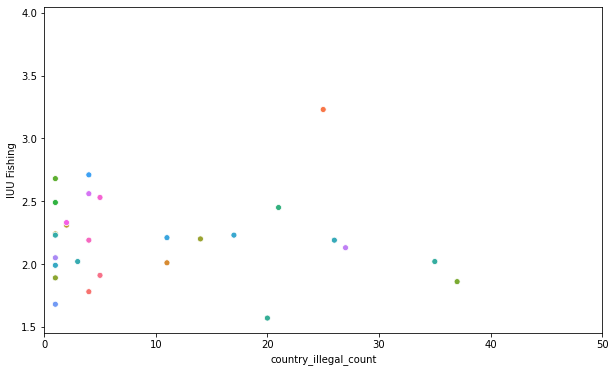

In [114]:
#plot checking

fig, ax = plt.subplots(figsize=(10,6))
g = sns.scatterplot(data=proofdf,
                x="country_illegal_count",
                y="IUU Fishing",
                hue='country',
                ax=ax);
g.set(xlim=(0, 50))

g.legend_.remove()

In [115]:
#improving it

descriptive=proofdf.describe().transpose()

In [116]:
descriptive

,count,mean,std,min,25%,50%,75%,max
const,37.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
country_illegal_count,37.0,284.594595,844.214015,1.00,2.00,11.00,37.00,4760.00
IUU Fishing,37.0,2.342162,0.482126,1.57,2.02,2.23,2.55,3.93


In [117]:
descriptive['IQR'] = descriptive['75%'] - descriptive['25%']
print(descriptive['IQR'])

const                     0.00
country_illegal_count    35.00
IUU Fishing               0.53
Name: IQR, dtype: float64


In [118]:
outlier25=descriptive['25%']-(1.5*descriptive['IQR'])

outlier75=descriptive['75%']+(1.5*descriptive['IQR'])

In [119]:
print('outlier25', outlier25)
print('outlier75', outlier75)

outlier25 const                     1.000
country_illegal_count   -50.500
IUU Fishing               1.225
dtype: float64
outlier75 const                     1.000
country_illegal_count    89.500
IUU Fishing               3.345
dtype: float64


In [120]:
#copy to take outliers into consideation

outdf=proofdf.copy()

In [121]:
outdf.head()

,const,country,country_illegal_count,IUU Fishing
0,1.0,Australia,5,1.91
1,1.0,Belize,4,1.78
2,1.0,Cambodia,25,3.23
3,1.0,Canada,183,1.97
4,1.0,Chile,11,2.01


In [122]:
outdf.drop(outdf[(outdf['country_illegal_count'] >= 89.5)].index, inplace=True)

In [123]:
outdf

,const,country,country_illegal_count,IUU Fishing
0,1.0,Australia,5,1.91
1,1.0,Belize,4,1.78
2,1.0,Cambodia,25,3.23
4,1.0,Chile,11,2.01
6,1.0,Colombia,2,2.31
7,1.0,Comoros,64,2.61
8,1.0,Côte d'Ivoire,1,2.24
9,1.0,Fiji,14,2.20
10,1.0,Germany,1,1.89
11,1.0,Iceland,37,1.86


In [124]:
youtdf=outdf['IUU Fishing']
Xoutdf=outdf[['const','country_illegal_count']]
regoutdf=sm.OLS(youtdf,Xoutdf).fit()
regoutdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.3994
Date:                Thu, 08 Oct 2020   Prob (F-statistic):              0.533
Time:                        09:56:02   Log-Likelihood:                -10.027
No. Observations:                  29   AIC:                             24.05
Df Residuals:                      27   BIC:                             26.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.1831      0.085     25.638      0.000       2.008       2.358
country_illegal_count     0.0028      0.004      0.632      0.533      -0.006       0.012
==============================================================================
Omnibus:                        3.481   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.017
Skew:                           0.566   Prob(JB):                        0.365
Kurtosis:                       3.623   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#check outliers

In [126]:
outdf2=proofdf.copy()

In [127]:
outdf2.drop(outdf2[(outdf2['country_illegal_count'] <= 89.5)].index, inplace=True)

In [128]:
youtdf2=outdf2['IUU Fishing']
Xoutdf2=outdf2[['const','country_illegal_count']]
regoutdf2=sm.OLS(youtdf2,Xoutdf2).fit()
regoutdf2.summary()

C:\Users\Bruna Miguel\Documents\anaconda\envs\matrix\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 08 Oct 2020   Prob (F-statistic):              0.238
Time:                        09:56:06   Log-Likelihood:                -6.1936
No. Observations:                   8   AIC:                             16.39
Df Residuals:                       6   BIC:                             16.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.5397      0.290      8.773      0.000       1.831       3.248
country_illegal_count     0.0002      0.000      1.311      0.238      -0.000       0.001
==============================================================================
Omnibus:                        2.292   Durbin-Watson:                   2.799
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.082
Skew:                           0.869   Prob(JB):                        0.582
Kurtosis:                       2.523   Cond. No.                     2.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
# small correlation

In [130]:
#check smaller cases from plot

outdf3=proofdf.copy()

In [131]:
outdf3.drop(outdf3[(outdf3['country_illegal_count'] >=60 )].index, inplace=True)

In [132]:
youtdf3=outdf3['IUU Fishing']
Xoutdf3=outdf3[['const','country_illegal_count']]
regoutdf3=sm.OLS(youtdf3,Xoutdf3).fit()
regoutdf3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IUU Fishing   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                   0.02779
Date:                Thu, 08 Oct 2020   Prob (F-statistic):              0.869
Time:                        09:56:07   Log-Likelihood:                -9.6977
No. Observations:                  28   AIC:                             23.40
Df Residuals:                      26   BIC:                             26.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.2135      0.091     24.283      0.000       2.026       2.401
country_illegal_count    -0.0010      0.006     -0.167      0.869      -0.013       0.011
==============================================================================
Omnibus:                        6.475   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                4.648
Skew:                           0.783   Prob(JB):                       0.0979
Kurtosis:                       4.237   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 10 ML Linear Regression trial (all features)

In [133]:
#import libraries

#import warnings
#warnings.filterwarnings('ignore')
#from sklearn.model_selection import train_test_split

In [134]:
#check for nulls

#total_lindf.isna().sum().tolist()

In [135]:
#create copy

#mlreg_df=total_lindf.copy()
#mlreg_df=mlreg_df.drop('const', axis=1)

In [136]:
#create train set

#train, test = train_test_split(mlreg_df, test_size=.25, random_state=42)

In [137]:
#mlreg_df.columns

In [138]:
#target_col = ["IUU Fishing"]
#num_cols = ['length', 'tonnage', 'engine_power', 'IUU Fishing', 'duration_hr','median_distance_km', 'median_speed_knots', 'start_month', 'start_hour','end_month', 'end_hour']
#bool_cols = ['Australia', 'Belize', 'Cambodia', 'Canada','Chile', 'China', 'Colombia', 'Comoros', "Côte d'Ivoire", 'Fiji','Germany', 'Iceland', 'India', 'Iran, Islamic Republic of', 'Japan','Kiribati', 'Korea, Republic of', 'Latvia', 'Lithuania','Micronesia, Federated States of', 'Netherlands', 'Norway', 'Oman','Papua New Guinea', 'Peru', 'Philippines', 'Poland','Russian Federation', 'Saint Kitts and Nevis', 'Seychelles', 'Spain','Taiwan, Province of China', 'Thailand', 'Ukraine', 'United Kingdom','United States', 'Vanuatu', 'drifting_longlines', 'fixed_gear','other_fishing', 'purse_seines', 'squid_jigger', 'trawlers','encounter_Afghanistan', 'encounter_Angola', 'encounter_Antarctica','encounter_Botswana', 'encounter_Brazil', 'encounter_China',"encounter_Côte d'Ivoire", 'encounter_Estonia', 'encounter_Greenland','encounter_Guinea', 'encounter_Guinea-Bissau', 'encounter_Iceland','encounter_India', 'encounter_Kazakhstan', 'encounter_Kyrgyzstan','encounter_Liberia', 'encounter_Mali', 'encounter_NA','encounter_Namibia', 'encounter_Oman', 'encounter_Pakistan','encounter_Senegal', 'encounter_Sierra Leone', 'encounter_Sweden','encounter_Tajikistan', 'encounter_Uzbekistan', 'encounter_Zambia','q1', 'q2', 'q3', 'q4']

In [139]:
#mlreg_df['IUU Fishing'].value_counts(normalize=True)

In [140]:
#import sklearn

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import balanced_accuracy_score

In [141]:
#train_X = train[num_cols + bool_cols]
#train_y = train[target_col]
#test_X = test[num_cols + bool_cols]
#test_y = test[target_col]

In [142]:
#test_y.shape

In [143]:
#linear regression

#lr = LinearRegression().fit(train_X, train_y)

In [144]:
#predictions = lr.predict(test_X)

In [145]:
#test_X.shape

In [146]:
#mlreg_df.shape

In [147]:
#predictions.shape

In [148]:
#predictions

In [149]:
#test_y

In [150]:
#lr.score(test_y, predictions)

In [151]:
#lr.coef_

## 11 China case

In [152]:
china_df=bin_df.copy()

In [153]:
china_df.columns

Index(['gear_type', 'length', 'tonnage', 'engine_power', 'country',
       'IUU Fishing', 'duration_hr', 'country_encounter', 'seasons'],
      dtype='object')

In [154]:
china_df=china_df.loc[china_df["country"] == 'China']

In [155]:
china_df.head()

,gear_type,length,tonnage,engine_power,country,IUU Fishing,duration_hr,country_encounter,seasons
203,trawlers,medium,huge,huge,China,3.93,small,NA,q3
204,trawlers,medium,huge,huge,China,3.93,medium,NA,q2
205,trawlers,small,medium,small,China,3.93,huge,NA,q4
206,trawlers,big,huge,huge,China,3.93,huge,NA,q2
207,trawlers,big,huge,huge,China,3.93,huge,NA,q1


<BarContainer object of 6 artists>

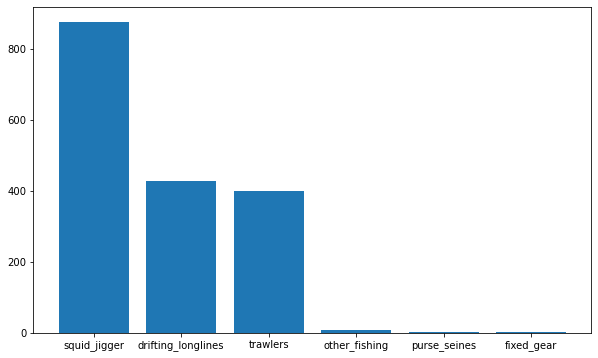

In [156]:
#checking trends with plot: gear_type

gearp = dict(china_df['gear_type'].value_counts())
names = list(gearp.keys())
values = list(gearp.values())

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(names,values)

In [157]:
#create function for the plots

def plot(variable):
    gearp = dict(china_df[variable].value_counts())
    names = list(gearp.keys())
    values = list(gearp.values())
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(names,values)

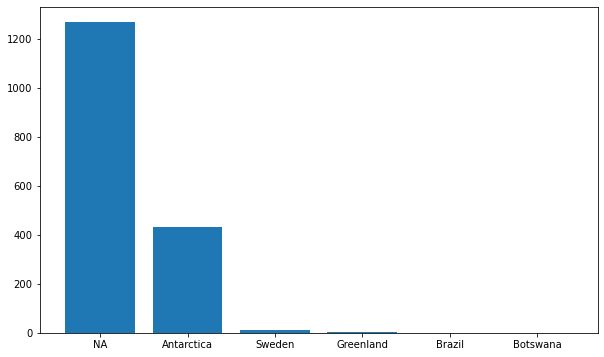

In [158]:
plot('country_encounter')

In [159]:
#engine power is usually huge, duration of the transaction fast and squid jigger
# Antarctica is a hot spot

In [160]:
china_df['gear_type'].value_counts()

squid_jigger          875
drifting_longlines    427
trawlers              401
other_fishing           7
purse_seines            3
fixed_gear              2
Name: gear_type, dtype: int64

In [161]:
china_df['duration_hr'].value_counts()

small         520
huge          343
very small    258
medium        257
medium/big    170
big           167
Name: duration_hr, dtype: int64

In [162]:
china_df['duration_hr'].sort_values().tolist()

['big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
 'big',
